## Part 1 - EDA

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [49]:
df = pd.read_json('logins.json')

What type is our column

In [50]:
df.dtypes

login_time    datetime64[ns]
dtype: object

Top 5 entries in DF

In [51]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Aggregate the login based on 15 min time intervals

In [52]:
df.set_index('login_time', inplace=True)

In [53]:
df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [54]:
df['count'] = 1

In [55]:
df = df.resample('15T').agg({'count':'sum'})

In [56]:
df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


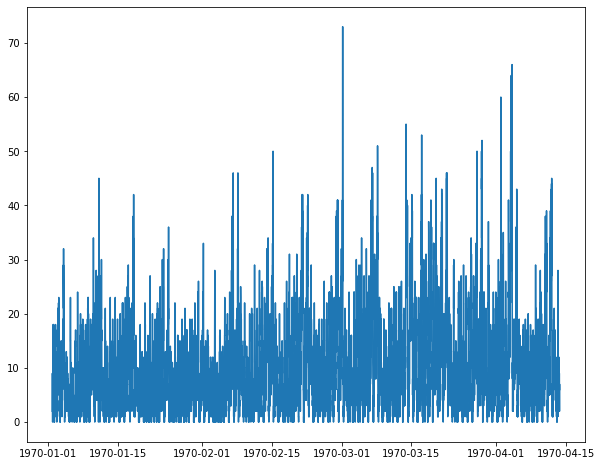

In [57]:
plt.figure(figsize=(10,8))
plt.plot(df)
plt.show()

In [58]:
dates, times = zip(*[(d.date(), d.time()) for d in df.index])
df = df.assign(date=dates, time=times)

In [59]:
df.reset_index(drop=True, inplace=True)

In [60]:
df.head()

,count,date,time
0,2,1970-01-01,20:00:00
1,6,1970-01-01,20:15:00
2,9,1970-01-01,20:30:00
3,7,1970-01-01,20:45:00
4,1,1970-01-01,21:00:00
